# Neural Nets with Keras

In [2]:
%matplotlib inline
%load_ext tensorboard

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time
import seaborn as sns
sns.set()

In [4]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
matplotlib 3.0.2
numpy 1.15.4
pandas 0.23.4
sklearn 0.20.1
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [5]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

### A neural net for regression

### 5.1)
Load the California housing dataset using `sklearn.datasets.fetch_california_housing`. This returns an object with a `DESCR` attribute describing the dataset, a `data` attribute with the input features, and a `target` attribute with the labels. The goal is to predict the price of houses in a district (a census block) given some stats about that district. This is a regression task (predicting values).

In [8]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [9]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
housing.data.shape

(20640, 8)

In [11]:
housing.target.shape

(20640,)

### 5.2)
Split the dataset into a training set, a validation set and a test set using Scikit-Learn's `sklearn.model_selection.train_test_split()` function.

In [12]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [13]:
len(X_train), len(X_valid), len(X_test)

(11610, 3870, 5160)

### 5.3)
Scale the input features (e.g., using a `sklearn.preprocessing.StandardScaler`). Once again, don't forget that you should not fit the validation set or the test set, only the training set.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### 5.4)
Now build, train and evaluate a neural network to tackle this problem. Then use it to make predictions on the test set.

**Tips**:
* Since you are predicting a single value per district (the median house price), there should only be one neuron in the output layer.
* Usually for regression tasks you don't want to use any activation function in the output layer (in some cases you may want to use `"relu"` or `"softplus"` if you want to constrain the predicted values to be positive, or `"sigmoid"` or `"tanh"` if you want to constrain the predicted values to 0-1 or -1-1).
* A good loss function for regression is generally the `"mean_squared_error"` (aka `"mse"`). When there are many outliers in your dataset, you may prefer to use the `"mean_absolute_error"` (aka `"mae"`), which is a bit less precise but less sensitive to outliers.

In [16]:
model = keras.models.Sequential([
    
    keras.layers.Dense(30, activation="relu",\
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
    
])

In [17]:
model.compile(loss="mean_squared_error",\
              optimizer=keras.optimizers.SGD(1e-3))

In [18]:
callbacks = [keras.callbacks.EarlyStopping(patience=10)]

In [19]:
history = model.fit(X_train_scaled,\
                    y_train,
                    validation_data=(X_valid_scaled, y_valid),\
                    epochs=100,
                    callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 41us/sample - loss: 1.4373 - val_loss: 4.9912
Epoch 2/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.8371 - val_loss: 0.8625
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.7555 - val_loss: 0.7340
Epoch 4/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.7094 - val_loss: 0.7095
Epoch 5/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6720 - val_loss: 0.6471
Epoch 6/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6392 - val_loss: 0.6335
Epoch 7/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6105 - val_loss: 0.5858
Epoch 8/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5852 - val_loss: 0.5641
Epoch 9/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.562

In [20]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.4072


0.40716409780258356

In [21]:
model.predict(X_test_scaled)

array([[0.6690421],
       [1.6140628],
       [3.5537164],
       ...,
       [1.504305 ],
       [2.528902 ],
       [3.6941016]], dtype=float32)

In [23]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

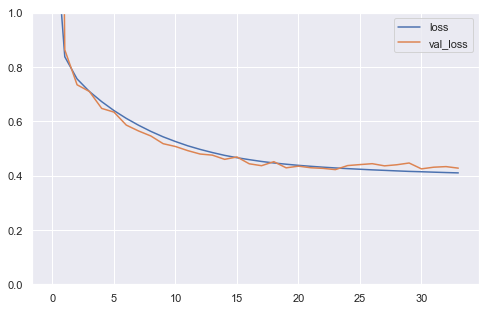

In [26]:
plot_learning_curves(history)

### Hyperparameter search

### 6.1)
Try training your model multiple times, with different a learning rate each time (e.g., 1e-4, 3e-4, 1e-3, 3e-3, 3e-2), and compare the learning curves. For this, you need to create a `keras.optimizers.SGD` optimizer and specify the `learning_rate` in its constructor, then pass this `SGD` instance to the `compile()` method using the `optimizer` argument.

In [27]:
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for learning_rate in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=10)]
    history = model.fit(X_train_scaled, y_train,
                        validation_data=(X_valid_scaled, y_valid), epochs=100,
                        callbacks=callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 46us/sample - loss: 5.4083 - val_loss: 4.2292
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 3.7043 - val_loss: 3.6743
Epoch 3/100
11610/11610 [==============================] - 0s 33us/sample - loss: 2.6746 - val_loss: 4.1190
Epoch 4/100
11610/11610 [==============================] - 0s 32us/sample - loss: 2.0397 - val_loss: 4.4212
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.6337 - val_loss: 4.5097
Epoch 6/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.3677 - val_loss: 4.2815
Epoch 7/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.1891 - val_loss: 3.9109
Epoch 8/100
11610/11610 [==============================] - 0s 32us/sample - loss: 1.0654 - val_loss: 3.4672
Epoch 9/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.978

Epoch 76/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5369 - val_loss: 0.5099
Epoch 77/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5353 - val_loss: 0.5079
Epoch 78/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5336 - val_loss: 0.5062
Epoch 79/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5320 - val_loss: 0.5043
Epoch 80/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5305 - val_loss: 0.5026
Epoch 81/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5289 - val_loss: 0.5010
Epoch 82/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5274 - val_loss: 0.4988
Epoch 83/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5259 - val_loss: 0.4967
Epoch 84/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5244 - val_loss: 0.4952
Epoch 85/100
11610/

Epoch 51/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4613 - val_loss: 0.4363
Epoch 52/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4598 - val_loss: 0.4352
Epoch 53/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4583 - val_loss: 0.4353
Epoch 54/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4569 - val_loss: 0.4346
Epoch 55/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4555 - val_loss: 0.4300
Epoch 56/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4541 - val_loss: 0.4291
Epoch 57/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4529 - val_loss: 0.4283
Epoch 58/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4516 - val_loss: 0.4252
Epoch 59/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4503 - val_loss: 0.4226
Epoch 60/100
11610/

Epoch 26/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4283 - val_loss: 0.4065
Epoch 27/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4261 - val_loss: 0.4083
Epoch 28/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4242 - val_loss: 0.4039
Epoch 29/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4224 - val_loss: 0.3960
Epoch 30/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4207 - val_loss: 0.3992
Epoch 31/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4188 - val_loss: 0.3920
Epoch 32/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4174 - val_loss: 0.4008
Epoch 33/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4159 - val_loss: 0.3919
Epoch 34/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4143 - val_loss: 0.4006
Epoch 35/100
11610/

Epoch 41/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3665 - val_loss: 0.6627
Epoch 42/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3618 - val_loss: 0.8439
Epoch 43/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3624 - val_loss: 0.8183
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.7428 - val_loss: 0.5310
Epoch 2/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4772 - val_loss: 0.7309
Epoch 3/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4394 - val_loss: 0.4341
Epoch 4/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4377 - val_loss: 0.9035
Epoch 5/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4206 - val_loss: 2.1735
Epoch 6/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.

11610/11610 [==============================] - 0s 29us/sample - loss: 0.3491 - val_loss: 0.3259
Epoch 16/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3452 - val_loss: 0.3255
Epoch 17/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3875 - val_loss: 0.3663
Epoch 18/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3572 - val_loss: 0.3324
Epoch 19/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3551 - val_loss: 0.3254
Epoch 20/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3532 - val_loss: 0.3350
Epoch 21/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3404 - val_loss: 0.3183
Epoch 22/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3382 - val_loss: 0.4119
Epoch 23/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3356 - val_loss: 0.3146
Epoch 24/100
11610/11610 [======

Learning rate: 0.0001


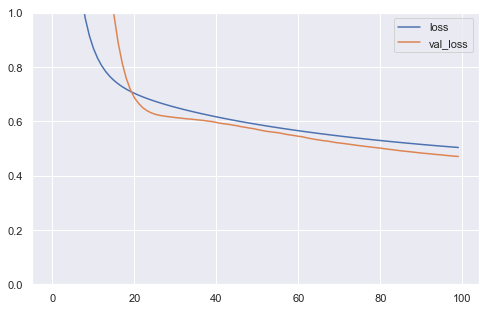

Learning rate: 0.0003


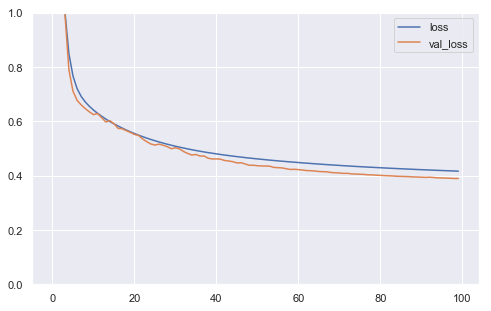

Learning rate: 0.001


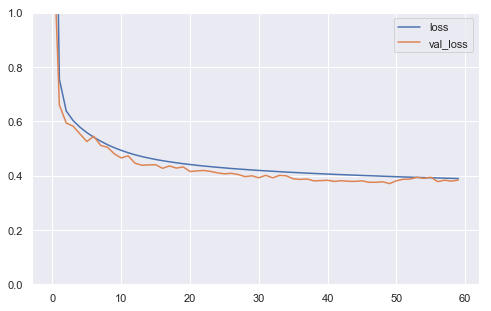

Learning rate: 0.003


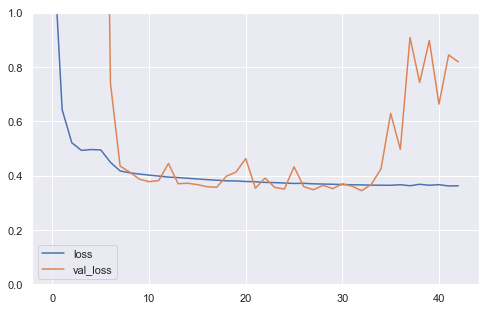

Learning rate: 0.01


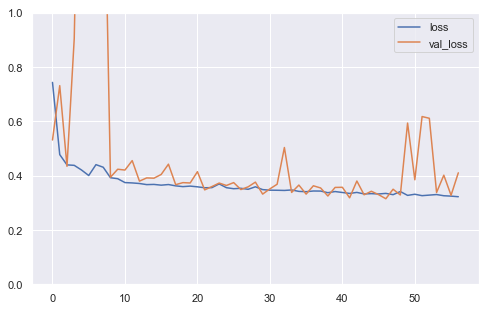

Learning rate: 0.03


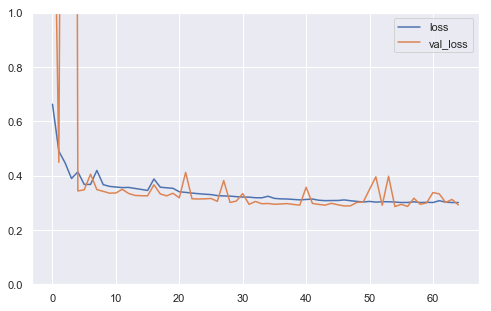

In [29]:
for learning_rate, history in zip(learning_rates, histories):
    print("Learning rate:", learning_rate)
    plot_learning_curves(history)

### 6.2)
Let's look at a more sophisticated way to tune hyperparameters. Create a `build_model()` function that takes three arguments, `n_hidden`, `n_neurons`, `learning_rate`, and builds, compiles and returns a model with the given number of hidden layers, the given number of neurons and the given learning rate. It is good practice to give a reasonable default value to each argument.

In [30]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    options = {"input_shape": X_train.shape[1:]}
    for layer in range(n_hidden + 1):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

### 6.3)
Create a `keras.wrappers.scikit_learn.KerasRegressor` and pass the `build_model` function to the constructor. This gives you a Scikit-Learn compatible predictor. Try training it and using it to make predictions. Note that you can pass the `n_epochs`, `callbacks` and `validation_data` to the `fit()` method.

In [31]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [32]:
keras_reg.fit(X_train_scaled, y_train, epochs=100,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.9440 - val_loss: 9.4997
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6070 - val_loss: 34.8291
Epoch 3/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6444 - val_loss: 2.0556
Epoch 4/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4426 - val_loss: 0.4424
Epoch 5/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4072 - val_loss: 0.3828
Epoch 6/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3978 - val_loss: 0.3810
Epoch 7/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3908 - val_loss: 0.3813
Epoch 8/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3859 - val_loss: 0.3877
Epoch 9/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.38

In [33]:
keras_reg.predict(X_test_scaled)

array([0.76681733, 1.8267894 , 4.295369  , ..., 1.3182094 , 2.648156  ,
       4.0545692 ], dtype=float32)

### 6.4)
Use a `sklearn.model_selection.RandomizedSearchCV` to search the hyperparameter space of your `KerasRegressor`.

In [34]:
from scipy.stats import reciprocal

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [36]:
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_valid_scaled, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0023302047292153563, n_hidden=2, n_neurons=41 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.6032 - val_loss: 1.7070
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6348 - val_loss: 0.5833
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5404 - val_loss: 0.4916
Epoch 4/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4899 - val_loss: 0.4363
Epoch 5/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4539 - val_loss: 0.4108
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4299 - val_loss: 0.4061
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4147 - val_loss: 0.4094
Epoch 8/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4044 - val_loss: 0.4162
Epoch 9/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3966 - val_loss: 0.413

7740/7740 [==============================] - 0s 38us/sample - loss: 0.3001 - val_loss: 0.3010
Epoch 78/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.2996 - val_loss: 0.2999
Epoch 79/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.2981 - val_loss: 0.3223
Epoch 80/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.2989 - val_loss: 0.3033
Epoch 81/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.2978 - val_loss: 0.3024
Epoch 82/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.2972 - val_loss: 0.2972
Epoch 83/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.2968 - val_loss: 0.3024
Epoch 84/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.2964 - val_loss: 0.2988
Epoch 85/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.2953 - val_loss: 0.3088
Epoch 86/100
7740/7740 [==========================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.3s remaining:    0.0s


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 55us/sample - loss: 1.3620 - val_loss: 1.9705
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5921 - val_loss: 0.6401
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5145 - val_loss: 0.4716
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4709 - val_loss: 0.4411
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4432 - val_loss: 0.4216
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4248 - val_loss: 0.3981
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4126 - val_loss: 0.3831
Epoch 8/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4020 - val_loss: 0.3851
Epoch 9/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3949 - val_loss: 0.408

Epoch 27/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3189 - val_loss: 0.3051
Epoch 28/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3172 - val_loss: 0.3059
Epoch 29/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3154 - val_loss: 0.3059
Epoch 30/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3146 - val_loss: 0.3134
Epoch 31/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3111 - val_loss: 0.3168
Epoch 32/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3134 - val_loss: 0.3356
Epoch 33/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3130 - val_loss: 0.3226
Epoch 34/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3100 - val_loss: 0.3243
Epoch 35/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3097 - val_loss: 0.3224
Epoch 36/100
7740/7740 [=============

7740/7740 [==============================] - 0s 34us/sample - loss: 0.3536 - val_loss: 0.3517
Epoch 21/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3496 - val_loss: 0.3682
Epoch 22/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3599 - val_loss: 0.3256
Epoch 23/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3469 - val_loss: 0.3334
Epoch 24/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3439 - val_loss: 0.3432
Epoch 25/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3469 - val_loss: 0.3219
Epoch 26/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3416 - val_loss: 0.3368
Epoch 27/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3394 - val_loss: 0.3201
Epoch 28/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3370 - val_loss: 0.3207
Epoch 29/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 42us/sample - loss: 0.3287 - val_loss: 0.3593
Epoch 37/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3278 - val_loss: 0.3276
Epoch 38/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3272 - val_loss: 0.4318
Epoch 39/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3264 - val_loss: 0.3511
Epoch 40/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3252 - val_loss: 0.3221
Epoch 41/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3240 - val_loss: 0.3791
Epoch 42/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3236 - val_loss: 0.3305
Epoch 43/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3225 - val_loss: 0.3361
Epoch 44/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3210 - val_loss: 0.3781
Epoch 45/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.3638 - val_loss: 0.3469
Epoch 22/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3600 - val_loss: 0.3725
Epoch 23/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3581 - val_loss: 0.4448
Epoch 24/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3571 - val_loss: 0.3868
Epoch 25/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3549 - val_loss: 0.3871
Epoch 26/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3532 - val_loss: 0.3699
Epoch 27/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3510 - val_loss: 0.3456
Epoch 28/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3492 - val_loss: 0.4108
Epoch 29/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3481 - val_loss: 0.3753
Epoch 30/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.3038 - val_loss: 0.3123
Epoch 42/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3025 - val_loss: 0.3372
Epoch 43/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3027 - val_loss: 0.3443
Epoch 44/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3021 - val_loss: 0.3409
Epoch 45/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3002 - val_loss: 0.3001
Epoch 46/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2992 - val_loss: 0.3370
Epoch 47/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2981 - val_loss: 0.3304
Epoch 48/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2979 - val_loss: 0.3872
Epoch 49/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2984 - val_loss: 0.3408
Epoch 50/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 38us/sample - loss: 0.3159 - val_loss: 0.4119
Epoch 40/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3158 - val_loss: 0.3252
Epoch 41/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3144 - val_loss: 0.3174
Epoch 42/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3129 - val_loss: 0.3911
Epoch 43/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3131 - val_loss: 0.3167
Epoch 44/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3117 - val_loss: 0.4159
Epoch 45/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3113 - val_loss: 0.3414
Epoch 46/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3078 - val_loss: 0.3597
Epoch 47/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3089 - val_loss: 0.3062
Epoch 48/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.2955 - val_loss: 0.3009
Epoch 50/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2912 - val_loss: 0.3113
Epoch 51/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2909 - val_loss: 0.3125
Epoch 52/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2903 - val_loss: 0.3306
Epoch 53/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2884 - val_loss: 0.2966
Epoch 54/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2876 - val_loss: 0.3536
Epoch 55/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2877 - val_loss: 0.4683
Epoch 56/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.2902 - val_loss: 0.4054
Epoch 57/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.2866 - val_loss: 0.3190
Epoch 58/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.3238 - val_loss: 0.3452
Epoch 29/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3215 - val_loss: 0.3300
Epoch 30/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3198 - val_loss: 0.3281
Epoch 31/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3173 - val_loss: 0.3994
Epoch 32/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3172 - val_loss: 0.3340
Epoch 33/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3153 - val_loss: 0.3991
Epoch 34/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3152 - val_loss: 0.3153
Epoch 35/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3128 - val_loss: 0.3425
Epoch 36/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3115 - val_loss: 0.3047
Epoch 37/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.3934 - val_loss: 0.3825
Epoch 44/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3921 - val_loss: 0.3693
Epoch 45/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3905 - val_loss: 0.3694
Epoch 46/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3891 - val_loss: 0.3673
Epoch 47/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3875 - val_loss: 0.3753
Epoch 48/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3862 - val_loss: 0.3868
Epoch 49/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3850 - val_loss: 0.3735
Epoch 50/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3837 - val_loss: 0.3745
Epoch 51/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3825 - val_loss: 0.3742
Epoch 52/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.4495 - val_loss: 0.8446
Epoch 22/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4448 - val_loss: 0.8488
Epoch 23/100
7740/7740 [==============================] - 0s 15us/sample - loss: 0.4382
[CV]  learning_rate=0.0006477779307312751, n_hidden=1, n_neurons=59, total=   6.9s
[CV] learning_rate=0.0006477779307312751, n_hidden=1, n_neurons=59 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 51us/sample - loss: 2.6866 - val_loss: 8.0515
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 1.0829 - val_loss: 1.5668
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.7425 - val_loss: 0.6838
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6664 - val_loss: 0.6391
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.636

7740/7740 [==============================] - 0s 36us/sample - loss: 0.3628 - val_loss: 0.3633
Epoch 72/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3621 - val_loss: 0.3724
Epoch 73/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3615 - val_loss: 0.3504
Epoch 74/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3606 - val_loss: 0.3757
Epoch 75/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3601 - val_loss: 0.3428
Epoch 76/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3597 - val_loss: 0.3600
Epoch 77/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3590 - val_loss: 0.3468
Epoch 78/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3584 - val_loss: 0.3391
Epoch 79/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3576 - val_loss: 0.3450
Epoch 80/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 33us/sample - loss: 0.4504 - val_loss: 0.4292
Epoch 10/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4414 - val_loss: 0.4454
Epoch 11/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4341 - val_loss: 0.4018
Epoch 12/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4281 - val_loss: 0.4089
Epoch 13/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4226 - val_loss: 0.4120
Epoch 14/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4179 - val_loss: 0.4455
Epoch 15/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4138 - val_loss: 0.4541
Epoch 16/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4108 - val_loss: 0.4184
Epoch 17/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4075 - val_loss: 0.4369
Epoch 18/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 41us/sample - loss: 0.3073 - val_loss: 0.3239
Epoch 24/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3062 - val_loss: 0.3073
Epoch 25/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3044 - val_loss: 0.3243
Epoch 26/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3034 - val_loss: 0.3801
Epoch 27/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3025 - val_loss: 0.3579
Epoch 28/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3026 - val_loss: 0.3355
Epoch 29/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3003 - val_loss: 0.3455
Epoch 30/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.2983 - val_loss: 0.3128
Epoch 31/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.2955 - val_loss: 0.3165
Epoch 32/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 40us/sample - loss: 0.2986 - val_loss: 0.3475
Epoch 46/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.2949 - val_loss: 0.3191
Epoch 47/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.2946 - val_loss: 0.3201
Epoch 48/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.2937 - val_loss: 0.3001
Epoch 49/100
7740/7740 [==============================] - 0s 16us/sample - loss: 0.3133
[CV]  learning_rate=0.004576909498448105, n_hidden=2, n_neurons=87, total=  15.6s
[CV] learning_rate=0.0011714615165291644, n_hidden=0, n_neurons=56 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 46us/sample - loss: 2.4510 - val_loss: 5.1025
Epoch 2/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.9274 - val_loss: 0.8434
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.75

7740/7740 [==============================] - 0s 34us/sample - loss: 0.3667 - val_loss: 0.3627
Epoch 70/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3669 - val_loss: 0.3584
Epoch 71/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3658 - val_loss: 0.3676
Epoch 72/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3658 - val_loss: 0.3675
Epoch 73/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3650 - val_loss: 0.4163
Epoch 74/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3647 - val_loss: 0.3869
Epoch 75/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3644 - val_loss: 0.3578
Epoch 76/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3634 - val_loss: 0.4146
Epoch 77/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3635 - val_loss: 0.3891
Epoch 78/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 34us/sample - loss: 0.4300 - val_loss: 0.4034
Epoch 23/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4266 - val_loss: 0.3982
Epoch 24/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4237 - val_loss: 0.3950
Epoch 25/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4206 - val_loss: 0.4003
Epoch 26/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4182 - val_loss: 0.3956
Epoch 27/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4158 - val_loss: 0.3966
Epoch 28/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4134 - val_loss: 0.3945
Epoch 29/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4114 - val_loss: 0.3836
Epoch 30/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4094 - val_loss: 0.3941
Epoch 31/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 35us/sample - loss: 0.3640 - val_loss: 0.3535
Epoch 99/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3636 - val_loss: 0.3502
Epoch 100/100
7740/7740 [==============================] - 0s 14us/sample - loss: 0.3623
[CV]  learning_rate=0.0011714615165291644, n_hidden=0, n_neurons=56, total=  26.5s
[CV] learning_rate=0.0012578066689117673, n_hidden=1, n_neurons=60 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 52us/sample - loss: 2.0678 - val_loss: 1.4867
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.7582 - val_loss: 0.7377
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6402 - val_loss: 0.5802
Epoch 4/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5891 - val_loss: 0.5485
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.55

7740/7740 [==============================] - 0s 35us/sample - loss: 0.3302 - val_loss: 0.3653
Epoch 72/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3300 - val_loss: 0.3384
Epoch 73/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3289 - val_loss: 0.3897
Epoch 74/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3286 - val_loss: 0.3191
Epoch 75/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3282 - val_loss: 0.3525
Epoch 76/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3274 - val_loss: 0.3197
Epoch 77/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3268 - val_loss: 0.4065
Epoch 78/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3270 - val_loss: 0.3257
Epoch 79/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3256 - val_loss: 0.3260
Epoch 80/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 37us/sample - loss: 0.3662 - val_loss: 0.3659
Epoch 43/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3652 - val_loss: 0.3720
Epoch 44/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3645 - val_loss: 0.3576
Epoch 45/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3633 - val_loss: 0.3676
Epoch 46/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3623 - val_loss: 0.3505
Epoch 47/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3613 - val_loss: 0.3488
Epoch 48/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3604 - val_loss: 0.3592
Epoch 49/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3598 - val_loss: 0.3445
Epoch 50/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3590 - val_loss: 0.3681
Epoch 51/100
7740/7740 [==========================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.3min finished


Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.8992 - val_loss: 2.7901
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4828 - val_loss: 0.4578
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4082 - val_loss: 0.3782
Epoch 4/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3842 - val_loss: 0.4179
Epoch 5/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3707 - val_loss: 0.3564
Epoch 6/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3624 - val_loss: 0.3539
Epoch 7/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3541 - val_loss: 0.3745
Epoch 8/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3493 - val_loss: 0.4061
Epoch 9/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.344

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x11213ed68>,
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_hidden': [0, 1, 2, 3], 'n_neurons': array([ 1,  2, ..., 98, 99]), 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a3bcea4a8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [37]:
rnd_search_cv.best_params_

{'learning_rate': 0.004038022680351922, 'n_hidden': 2, 'n_neurons': 69}

In [38]:
rnd_search_cv.best_score_

-0.3275334420977329

In [39]:
rnd_search_cv.best_estimator_

### 6.5)
Evaluate the best model found on the test set. You can either use the best estimator's `score()` method, or get its underlying Keras model *via* its `model` attribute, and call this model's `evaluate()` method. Note that the estimator returns the negative mean square error (it's a score, not a loss, so higher is better).

In [40]:
rnd_search_cv.score(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 19us/sample - loss: 0.2968


-0.2968322378604911

In [41]:
model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.2968


0.2968322378604911

### 6.6)
Finally, save the best Keras model found. **Tip**: it is available via the best estimator's `model` attribute, and just need to call its `save()` method.

In [42]:
model.save("my_fine_tuned_housing_model.h5")